In [2]:
from util import *
import matplotlib.pyplot as plt
import seaborn as ses

In [3]:
mall_id = "m_7168"
train = load_train()
train = train[train.mall_id==mall_id]
test = load_testA()
test = test[test.mall_id == mall_id]
shop = load_shop_info()

In [10]:
print "train", "user shape", train.user_id.shape, "unique shape", train.user_id.unique().shape
print "test", "user shape", test.user_id.shape, "unique shape", test.user_id.unique().shape
print "train union test user unique shape", np.union1d(train.user_id.unique(),test.user_id.unique()).shape
print "train intersect test user unique shape", np.intersect1d(train.user_id.unique(),test.user_id.unique()).shape

train user shape (26355,) unique shape (15777,)
test user shape (11737,) unique shape (7721,)
train union test user unique shape (21895,)
train intersect test user unique shape (1603,)


In [25]:
user_count = train.groupby("user_id").count()["shop_id"].reset_index().sort_values(by="shop_id",ascending=False)
part_user_10 = user_count[user_count.shop_id > 10]

In [27]:
part_user_10[:10]

,user_id,shop_id
5006,u_26059542,55
6540,u_32130913,36
13508,u_57772653,34
6273,u_30769431,23
8278,u_38073414,21
13707,u_58732988,19
6566,u_32316126,19
9833,u_44071612,17
1241,u_13145620,17
10599,u_46189169,17


In [97]:
for i in range(10):
    u = train[train.user_id ==  part_user_10.user_id.values[i]]
    u_test = test[test.user_id == part_user_10.user_id.values[i]]
    u_matrix = train_matrix[np.in1d(u.index,train_index)] 
    print (u_matrix > -60).sum(0).max() / float(u_matrix.shape[0])
    print (u_matrix > -60).sum().max() * float(u.shop_id.unique().shape[0])
    print 

0.0545454545455
106.0

0.0555555555556
495.0

0.0588235294118
55.0

0.0869565217391
111.0

0.0952380952381
192.0

0.105263157895
174.0

0.105263157895
116.0

0.117647058824
288.0

0.117647058824
240.0

0.117647058824
192.0



/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 55
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 36
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 34
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 23
  after removing the cwd from sys.path.
/usr/lib/pyt

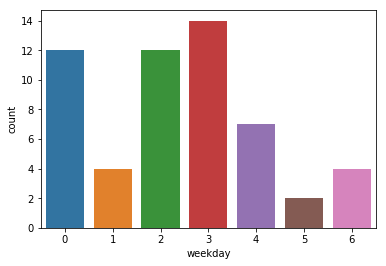

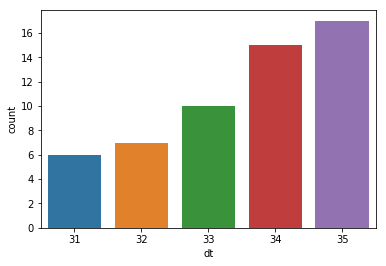

In [42]:
preprocess_basic_time(u)
ses.countplot(x="weekday",data=u)
plt.show()
ses.countplot(u.dt.dt.week)
plt.show()

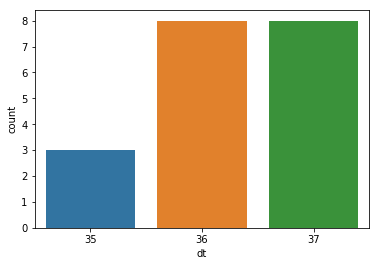

In [47]:
preprocess_basic_time(u_test)
ses.countplot(u_test.dt.dt.week)
plt.show()

In [57]:
for _u in part_user_10.user_id.values:
    print _u, train[train.user_id == _u].shop_id.unique()

u_26059542 ['s_460419']
u_32130913 ['s_295706' 's_293805' 's_2310712' 's_293785' 's_45040' 's_294960'
 's_293704' 's_293082' 's_293031']
u_57772653 ['s_460419']
u_30769431 ['s_294960' 's_460419' 's_293805']
u_38073414 ['s_2303129' 's_2310712' 's_295706' 's_293704' 's_15236' 's_293082']
u_58732988 ['s_295610' 's_293031' 's_294960' 's_45040' 's_293785' 's_2310712']
u_32316126 ['s_62317' 's_301215' 's_4386' 's_448230']
u_44071612 ['s_43369' 's_3749811' 's_3741710' 's_39875' 's_4386' 's_20731' 's_381787'
 's_63306' 's_3846218' 's_41948' 's_135671' 's_62317']
u_13145620 ['s_293704' 's_8426' 's_294228' 's_294960' 's_2310712' 's_293785'
 's_2303143' 's_295706' 's_293805' 's_97734']
u_46189169 ['s_2303129' 's_2783591' 's_293805' 's_2956027' 's_385716' 's_293704'
 's_293082' 's_293031']
u_28145494 ['s_295706' 's_301215' 's_2783591' 's_381583' 's_293805' 's_2303143'
 's_2310712' 's_2303129' 's_293785' 's_788134' 's_385716' 's_293704']
u_36521134 ['s_460419' 's_381583']
u_57038308 ['s_293805' 's_

In [59]:
print shop[shop.shop_id=="s_460419"]
print shop[shop.shop_id=="s_45040"]


       shop_id category_id  shop_longitude  shop_latitude  price mall_id
2905  s_460419        c_27      116.862611      40.326208     46  m_7168
     shop_id category_id  shop_longitude  shop_latitude  price mall_id
418  s_45040        c_29      116.863733      40.326627     50  m_7168


In [61]:
df,train_cache, test_cache = get_wifi_cache(mall_id)
train_index = train_cache[0]
train_use_wifi = train_cache[1]
train_matrix = train_cache[2]
test_index = test_cache[0]
test_use_wifi = test_cache[1]
test_matrix = test_cache[2]

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 55
  """Entry point for launching an IPython kernel.


9

9

In [98]:
part_user_10.user_id.values[0]

'u_26059542'

In [126]:
pt = train[train.user_id==part_user_10.user_id.values[0]]
s = train[train.shop_id=="s_460419"]

In [102]:
s.shape

(527, 11)

In [105]:
pre = pd.read_csv("../result/m_7168/test.csv",index_col=0)

In [113]:
error = pre[pre.predict != pre.real]


In [118]:
error.groupby("real").count().reset_index().sort_values(by="predict",ascending=False)

,real,predict,user_id
24,s_293805,345,345
20,s_293082,322,322
18,s_293031,311,311
14,s_2310712,310,310
25,s_294228,309,309
27,s_294960,294,294
17,s_2783591,290,290
23,s_293785,282,282
33,s_295610,273,273
34,s_295706,270,270


In [120]:
pre[pre.real=="s_293805"]

(1376, 3)

In [124]:
train_use_wifi[train_use_wifi!=""].shape

(2610,)

In [125]:
train_use_wifi.shape

(26355,)

In [215]:
d = rank_one(train,"shop_id")
verctors = []
for _s,_index in d.items():
    _shop = shop[shop.shop_id=="s_301215"][["shop_longitude","shop_latitude"]].values
    _shop = np.tile(_shop,(train_lonlats.shape[0],1))
    verctors.append(haversine(train_lonlats[:,0],train_lonlats[:,1],_shop[:,0],_shop[:,1]).reshape((-1,1)))
distance_matrix = np.concatenate(verctors,axis=1).shape

(26355, 99)

(26355, 99)

array([[ 0.02580212],
       [ 0.03927833],
       [ 0.04524253],
       ..., 
       [ 0.17089631],
       [ 0.19369635],
       [ 0.20150043]])